# Projet 4 - Partie 3 - Contrat de maintenance

### Chargement des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics.cluster import adjusted_rand_score

### Chargement des données

In [2]:
df = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet4/prepared_data.csv")

### Préparation des données pour contrat de maintenance

In [3]:
df = df.drop_duplicates(subset = 'customer_unique_id', keep = "last")

In [4]:
df = df.dropna()

In [5]:
df = df.reset_index()

In [6]:
df = df.drop(["index"], axis = 1)

In [7]:
df.shape

(77229, 19)

In [8]:
df.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,recency,frequency,monetary_value
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,2017-05-16 15:05:35,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,475,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2017-11-09 00:50:13,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,298,1,225.98
2,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,2017-05-07 20:11:26,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,3,484,1,124.99
3,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2018-02-03 19:45:40,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,212,1,106.99
4,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,2017-03-23 15:10:17,126.99,15.06,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,529,1,126.99


In [9]:
df['date'] = datetime.strptime(df.order_purchase_timestamp[1], "%Y-%m-%d %H:%M:%S")

In [10]:
for i in range(len(df)):
    df.loc[:,'date'][i] = datetime.strptime(df.loc[:,'order_purchase_timestamp'][i], "%Y-%m-%d %H:%M:%S")

/tmp/ipykernel_4975/134241741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'date'][i] = datetime.strptime(df.loc[:,'order_purchase_timestamp'][i], "%Y-%m-%d %H:%M:%S")


In [11]:
df.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,recency,frequency,monetary_value,date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,2017-05-16 15:05:35,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,475,1,124.99,2017-05-16 15:05:35
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,2017-11-09 00:50:13,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1,298,1,225.98,2017-11-09 00:50:13
2,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,2017-05-07 20:11:26,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,3,484,1,124.99,2017-05-07 20:11:26
3,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2018-02-03 19:45:40,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,212,1,106.99,2018-02-03 19:45:40
4,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,2017-03-23 15:10:17,126.99,15.06,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,4,529,1,126.99,2017-03-23 15:10:17


### Contrat de maintenance

In [12]:
df_keep = df[["date","customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]]

In [13]:
max(df_keep.loc[:,'date'])

Timestamp('2018-09-03 09:06:57')

In [14]:
_6mois = 180

In [15]:
d_nmois = max(df_keep.loc[:,'date']) - timedelta(_6mois)

In [16]:
df_nmois = df_keep[df_keep['date'] < d_nmois]

In [17]:
df_nmois.head()

,date,customer_zip_code_prefix,review_score,recency,frequency,monetary_value
0,2017-05-16 15:05:35,14409,4,475,1,124.99
1,2017-11-09 00:50:13,68030,1,298,1,225.98
2,2017-05-07 20:11:26,92480,3,484,1,124.99
3,2018-02-03 19:45:40,25931,4,212,1,106.99
4,2017-03-23 15:10:17,88460,4,529,1,126.99


In [18]:
sortdf = df_nmois.sort_values(by = "date")

In [19]:
df = sortdf.reset_index()

In [20]:
df = df.drop(["index"], axis = 1)

## Entrainement une fois puis suivi de l'ARI

### 7 Jours

In [45]:
tup_ari =[]
nb_jour = 7
    
df = df_keep[(df_keep['date'] < d_nmois)]
X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans = KMeans(n_clusters = 6, random_state = 0)
y_fit = kmeans.fit(X_scaled)
for i in range(25):
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

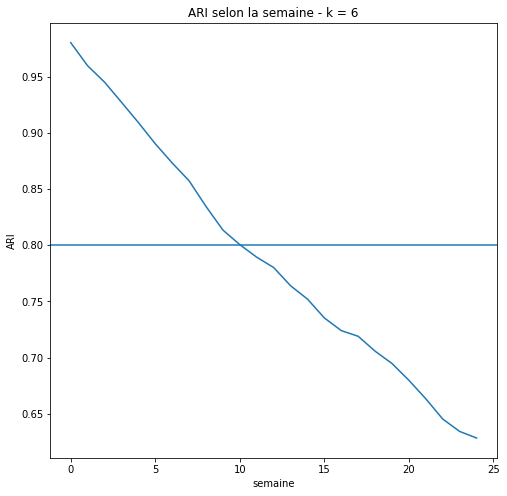

In [46]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la semaine - k = 6")
plt.plot(tup_ari)
plt.xlabel('semaine')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.show()

In [47]:
tup_ari =[]
nb_jour = 7
    
df = df_keep[(df_keep['date'] < d_nmois)]
X = df[["recency","frequency","monetary_value"]].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_fit = kmeans.fit(X_scaled)
for i in range(25):
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))
#tup_ari

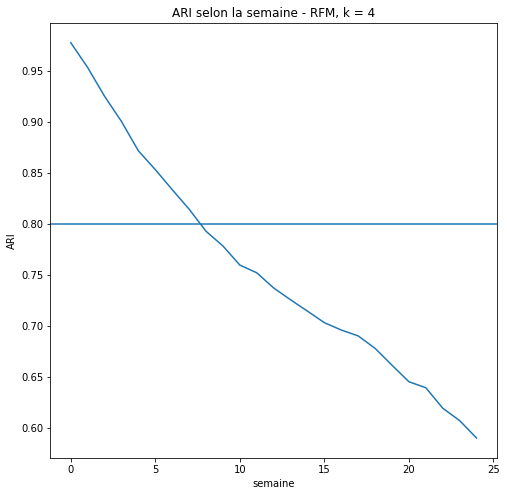

In [48]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la semaine - RFM, k = 4")
plt.plot(tup_ari)
plt.xlabel('semaine')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.show()

### 15 Jours

In [37]:
tup_ari =[]
nb_jour = 15
    
df = df_keep[(df_keep['date'] < d_nmois)]
X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans = KMeans(n_clusters = 6, random_state = 0)
y_fit = kmeans.fit(X_scaled)
for i in range(12):
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

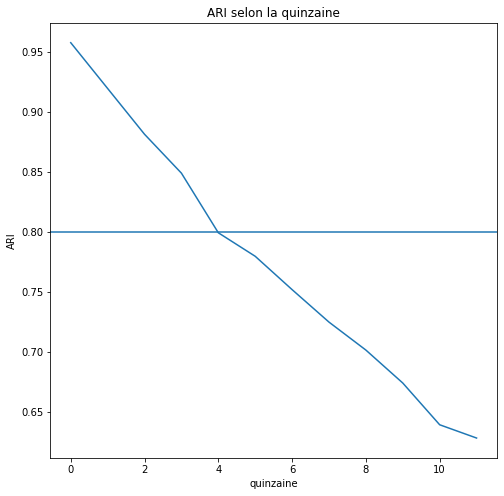

In [38]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la quinzaine")
plt.plot(tup_ari)
plt.xlabel('quinzaine')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.show()

In [39]:
tup_ari =[]
nb_jour = 15
    
df = df_keep[(df_keep['date'] < d_nmois)]
X = df[["recency","frequency","monetary_value"]].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_fit = kmeans.fit(X_scaled)
for i in range(12):
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

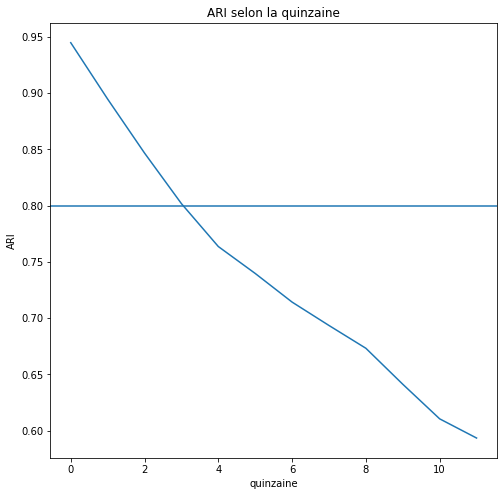

In [40]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la quinzaine")
plt.plot(tup_ari)
plt.xlabel('quinzaine')
plt.ylabel('ARI')
plt.axhline(y=0.8)
plt.show()

## Ré-entrainement toutes les périodes étudiées

### Tous les 7*4 jours

In [49]:
tup_ari =[]
nb_jour = 7*4
    

for i in range(6):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

#tup_ari

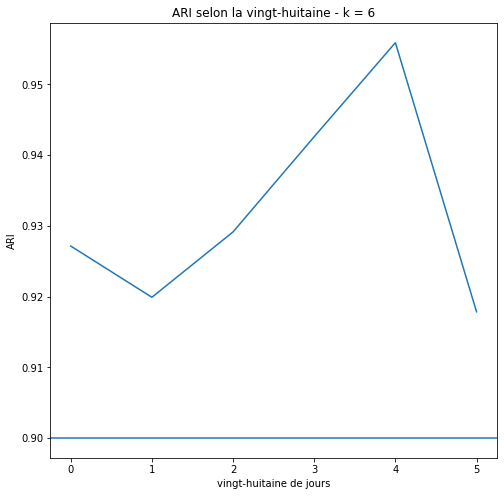

In [50]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la vingt-huitaine - k = 6")
plt.plot(tup_ari)
plt.xlabel('vingt-huitaine de jours')
plt.ylabel('ARI')
plt.axhline(y=0.9)
plt.show()

In [51]:
tup_ari =[]
nb_jour = 7*4
    

for i in range(6):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    
    kmeans2 = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

#tup_ari

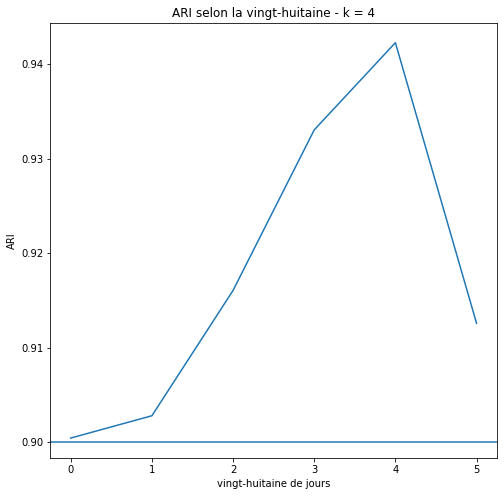

In [52]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la vingt-huitaine - k = 4")
plt.plot(tup_ari)
plt.xlabel('vingt-huitaine de jours')
plt.ylabel('ARI')
plt.axhline(y=0.9)
plt.show()

### Tous les 7*5 jours

In [27]:
tup_ari =[]
nb_jour = 7*5
    

for i in range(5):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

#tup_ari

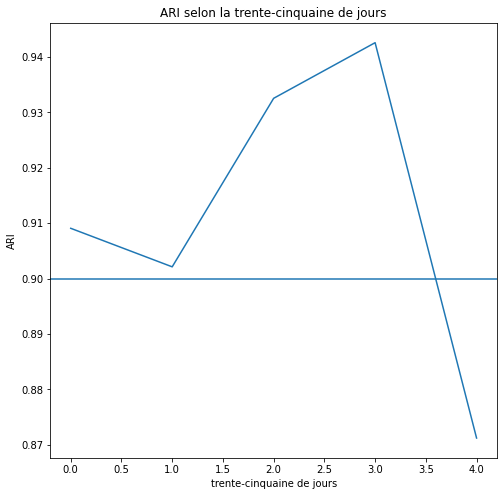

In [28]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la trente-cinquaine de jours")
plt.plot(tup_ari)
plt.xlabel('trente-cinquaine de jours')
plt.ylabel('ARI')
plt.axhline(y=0.9)
plt.show()

In [53]:
tup_ari =[]
nb_jour = 7*5
    

for i in range(5):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    
    kmeans2 = KMeans(n_clusters = 4, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

#tup_ari

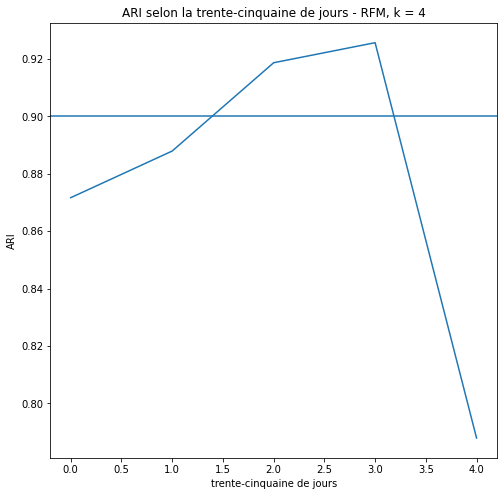

In [54]:
plt.subplots(figsize = (8,8))
plt.title("ARI selon la trente-cinquaine de jours - RFM, k = 4")
plt.plot(tup_ari)
plt.xlabel('trente-cinquaine de jours')
plt.ylabel('ARI')
plt.axhline(y=0.9)
plt.show()

## Expérimentation à la main

### 14 jours

In [310]:
tup_ari =[]
nb_jour = 14
    

for i in range(8):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

tup_ari

[0.9512775026487866,
 0.9770769320023192,
 0.9657974585906679,
 0.9714777314947688,
 0.9813254634002259,
 0.967516216773315,
 0.9475275194275776,
 0.9225039067019523]

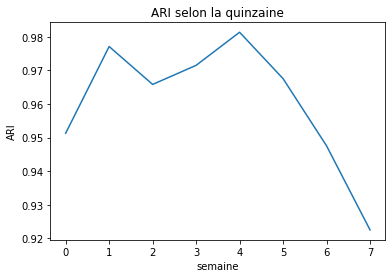

In [311]:
plt.title("ARI selon le couple de semaines")
plt.plot(tup_ari)
plt.xlabel('couple de semaine')
plt.ylabel('ARI')
plt.show()

## 21 jours

In [313]:
tup_ari =[]
nb_jour = 21
    

for i in range(5):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

tup_ari

[0.9416504126766354,
 0.9571995017942626,
 0.9611411364156097,
 0.9673362216049628,
 0.9399332300998366]

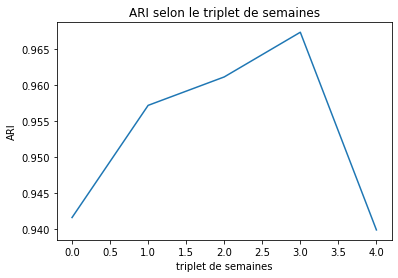

In [314]:
plt.title("ARI selon le triplet de semaines")
plt.plot(tup_ari)
plt.xlabel('triplet de semaines')
plt.ylabel('ARI')
plt.show()

## 28 jours

In [315]:
tup_ari =[]
nb_jour = 28
    

for i in range(4):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

tup_ari

[0.9320709803859802, 0.9455116312269187, 0.9571004295405159, 0.873153096644773]

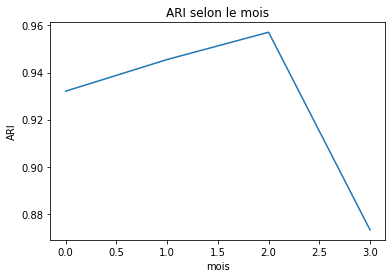

In [316]:
plt.title("ARI selon le mois")
plt.plot(tup_ari)
plt.xlabel('mois')
plt.ylabel('ARI')
plt.show()

## 35 jours

In [317]:
tup_ari =[]
nb_jour = 35
    

for i in range(3):
    df = df_keep[(df_keep['date'] < d_nmois + timedelta(nb_jour*i))]
    X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    kmeans = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans.fit(X_scaled)
    df_nmois_1sem = df_keep[(df_keep['date'] < (d_nmois + timedelta(nb_jour*(i+1))))]
    X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
    X_scaled = std_scale.transform(X)
    kmeans2 = KMeans(n_clusters = 6, random_state = 0)
    y_fit = kmeans2.fit_predict(X_scaled)
    y_predict = kmeans.predict(X_scaled)
    tup_ari.append(adjusted_rand_score(y_predict,y_fit))

tup_ari

[0.9242997698966327, 0.9397397721069253, 0.9128984467845211]

In [ ]:
plt.title("ARI selon le 35")
plt.plot(tup_ari)
plt.xlabel('mois')
plt.ylabel('ARI')
plt.show()

In [205]:
X = df[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_fit = kmeans.fit(X_scaled)

In [208]:
df_nmois_1sem = df_keep[(df_keep['date'] > d_nmois) & (df_keep['date'] < (d_nmois + timedelta(4)))]

In [209]:
df_nmois_1sem.head()

,date,customer_zip_code_prefix,review_score,recency,frequency,monetary_value
61,2018-05-08 23:25:12,37950,5,118,1,99.9
85,2018-05-08 17:10:08,79825,5,118,1,99.9
352,2018-05-09 15:39:10,9895,4,117,1,84.0
467,2018-05-09 17:41:08,8010,5,117,1,170.9
610,2018-05-09 22:42:30,4855,1,117,1,84.0


In [210]:
X = df_nmois_1sem[["customer_zip_code_prefix","review_score","recency","frequency","monetary_value"]].values
#std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
kmeans2 = KMeans(n_clusters = 4, random_state = 0)
y_fit = kmeans2.fit_predict(X_scaled)

In [211]:
y_predict = kmeans.predict(X_scaled)

In [212]:
adjusted_rand_score(y_predict,y_fit)

0.9564605304824348